 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [222]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [223]:
# Reading whale returns
whale_path = Path('.\Resources\whale_returns.csv')
whale_df = pd.read_csv(whale_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()

In [224]:
# Count nulls
whale_df.isnull().sum().sum()

4

In [225]:
# Drop nulls
whale_df = whale_df.dropna()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [226]:
# Reading algorithmic returns
algo_path = Path('.\Resources\\algo_returns.csv')
algo_df = pd.read_csv(algo_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()

In [227]:
# Count nulls
algo_df.isnull().sum().sum()

6

In [228]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1235 entries, 2014-06-05 to 2019-05-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Algo 1  1235 non-null   float64
 1   Algo 2  1235 non-null   float64
dtypes: float64(2)
memory usage: 28.9 KB


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [229]:
# Reading S&P 500 Closing Prices
sp500_path = Path('.\Resources\sp500_history.csv')
sp500_df = pd.read_csv(sp500_path, index_col='Date', infer_datetime_format=True, parse_dates=True).sort_index()

In [230]:
# Check Data Types
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1649 entries, 2012-10-01 to 2019-04-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Close   1649 non-null   object
dtypes: object(1)
memory usage: 25.8+ KB


In [231]:
# Fix Data Types
sp500_df['Close'] = sp500_df['Close'].str.replace('$','').astype('float')
sp500_df.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [232]:
# Calculate Daily Returns
sp500_df=sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [233]:
# Drop nulls
# Rename `Close` Column to be specific to this portfolio.
sp500_df = sp500_df.dropna().rename(columns = {'Close':'S&P 500'})
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1648 entries, 2012-10-02 to 2019-04-23
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S&P 500  1648 non-null   float64
dtypes: float64(1)
memory usage: 25.8 KB


## Combine Whale, Algorithmic, and S&P 500 Returns

In [234]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
og_returns_df = pd.concat([sp500_df,algo_df,whale_df], axis = 'columns', join = 'inner')
og_returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1043 entries, 2015-03-03 to 2019-04-23
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   S&P 500                      1043 non-null   float64
 1   Algo 1                       1043 non-null   float64
 2   Algo 2                       1043 non-null   float64
 3   SOROS FUND MANAGEMENT LLC    1043 non-null   float64
 4   PAULSON & CO.INC.            1043 non-null   float64
 5   TIGER GLOBAL MANAGEMENT LLC  1043 non-null   float64
 6   BERKSHIRE HATHAWAY INC       1043 non-null   float64
dtypes: float64(7)
memory usage: 65.2 KB


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

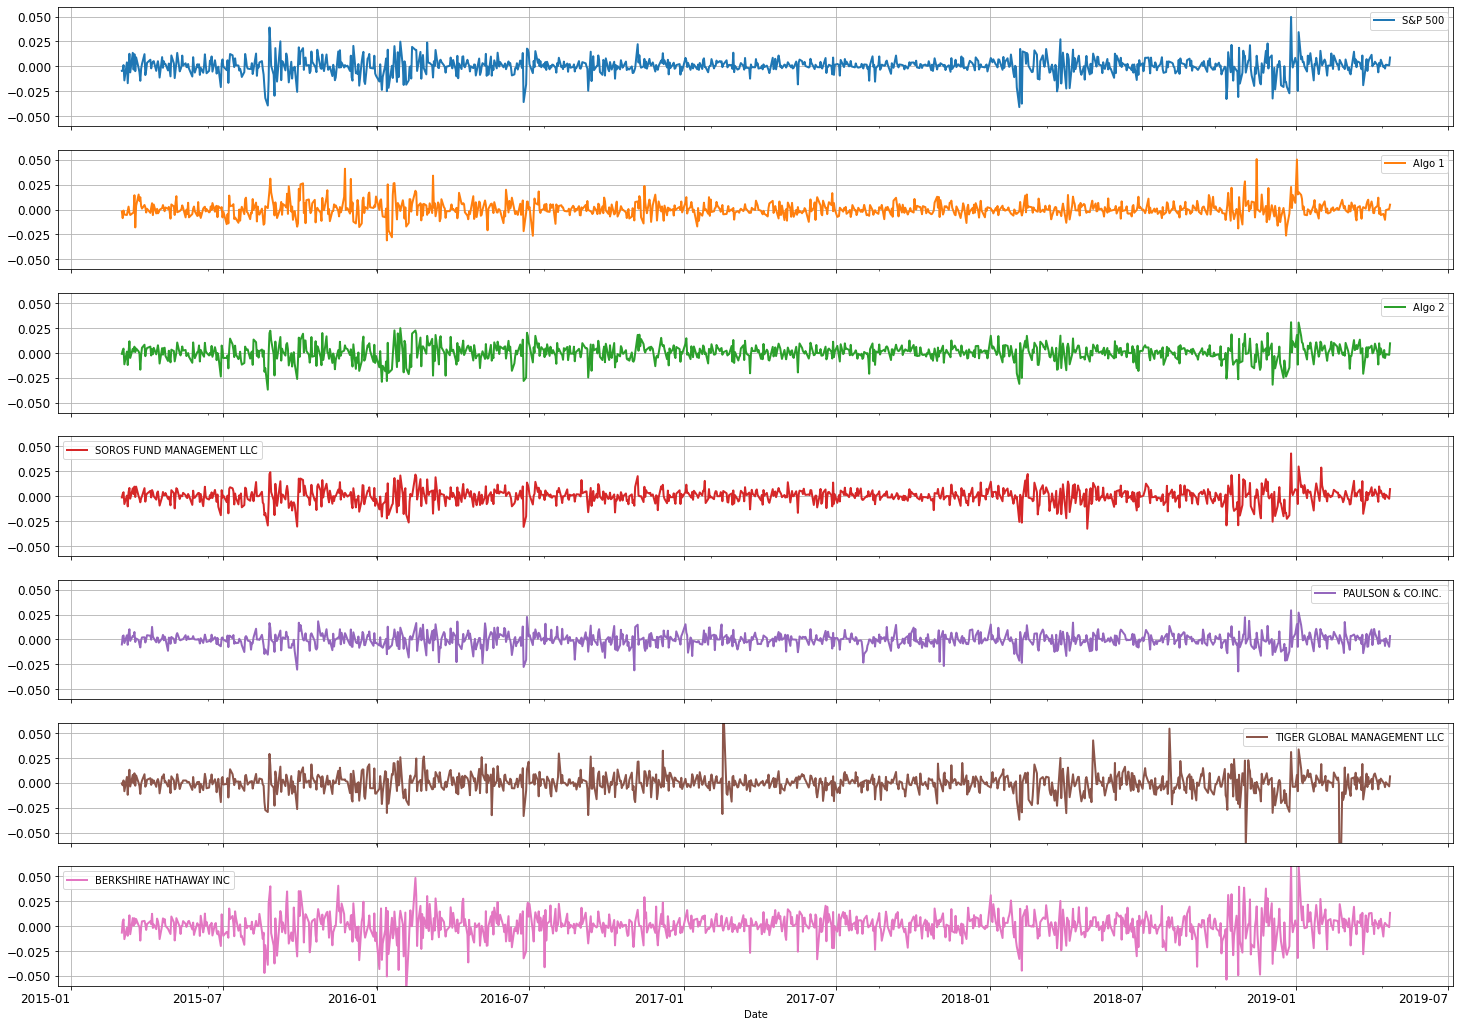

In [235]:
# Plot daily returns of all portfolios
og_returns_df.plot(
            kind = 'line', figsize = (25,20), grid = True, subplots = True, fontsize = 12, ylim = [-.06,.06], rot = 360, lw = 2)

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Portfolio Returns'}, xlabel='Year-Month', ylabel='Cumulative Returns'>

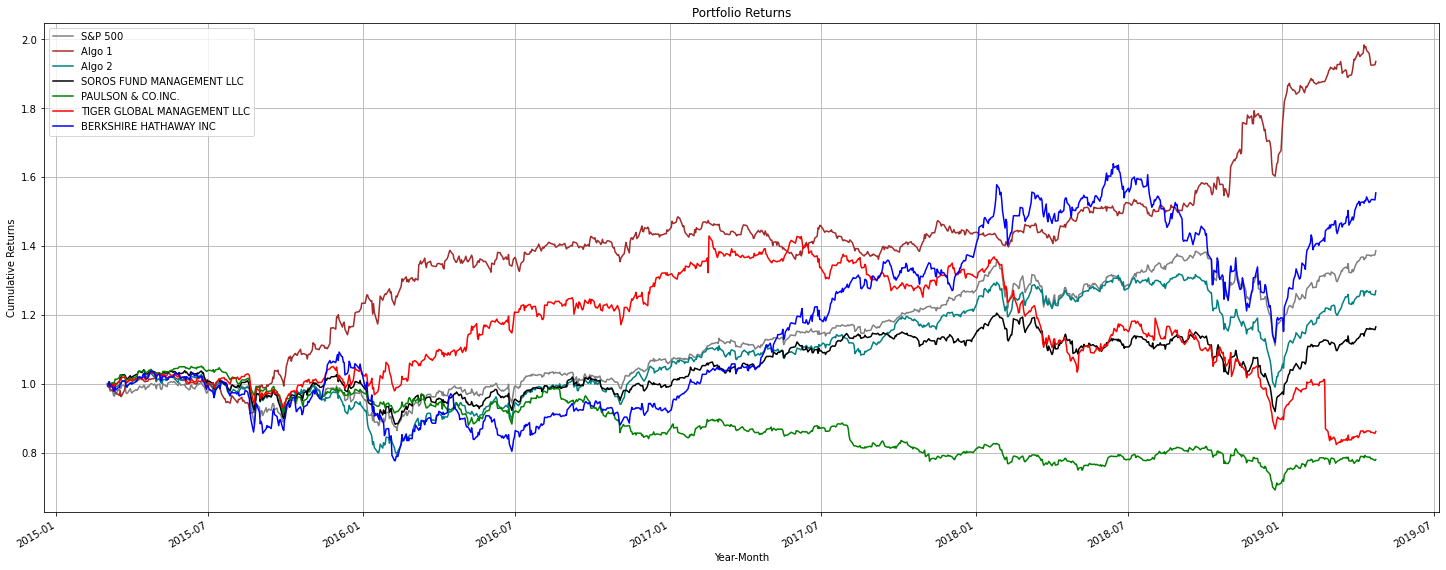

In [236]:
# Calculate cumulative returns of all portfolios
cum_return = (1 + og_returns_df).cumprod()
# Plot cumulative returns
cum_return.plot(
        kind = 'line', figsize = (25,10), grid = True, title = "Portfolio Returns", ylabel = "Cumulative Returns"
, xlabel = 'Year-Month', fontsize = 10, color = ['grey','brown','teal','black','green','red','blue'])

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Portfolio Returns'}, ylabel='Risk Percentile'>

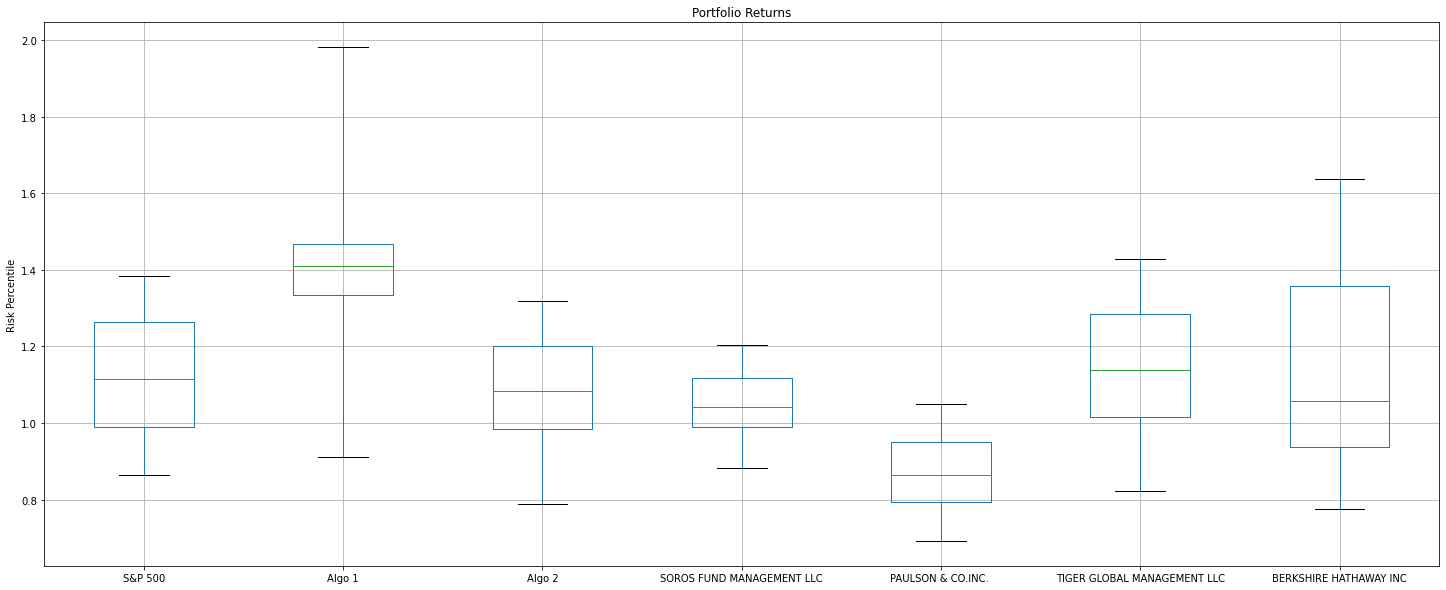

In [237]:
# Box plot to visually show risk
cum_return.plot(kind = 'box'
    , figsize = (25,10), grid = True , title = "Portfolio Returns", ylabel = "Risk Percentile", rot = 360, whis = [0,100])

### Calculate Standard Deviations

In [238]:
# Calculate the daily standard deviations of all portfolios
daily_std = og_returns_df.std().sort_values()
daily_std


PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [239]:
# Calculate  the daily standard deviation of S&P 500
print(daily_std['S&P 500'].round(6))
daily_std['S&P 500']

# Determine which portfolios are riskier than the S&P 500
daily_std_chart= pd.concat([daily_std],axis = 'columns',join = 'outer')
bins = [0, 0.008553, 0.008555, 1]
group_names = ['Lower', 'Benchmark', 'Higher']
daily_std_chart['Risk Level'] = pd.cut(daily_std_chart[0], bins, labels = group_names)
daily_std_chart.columns = ['STD','Risk Level']
print(f'These Portfolios are riskier than the S&P 500: \n\n '
      f'{daily_std_chart.iloc[5::]}')

0.008554
These Portfolios are riskier than the S&P 500: 

                                   STD Risk Level
TIGER GLOBAL MANAGEMENT LLC  0.010894     Higher
BERKSHIRE HATHAWAY INC       0.012919     Higher


### Calculate the Annualized Standard Deviation

In [240]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = daily_std*np.sqrt(252)
annual_std.sort_values(inplace = True)
annual_std

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling STD'}, xlabel='Year-Month', ylabel='Standard Dev'>

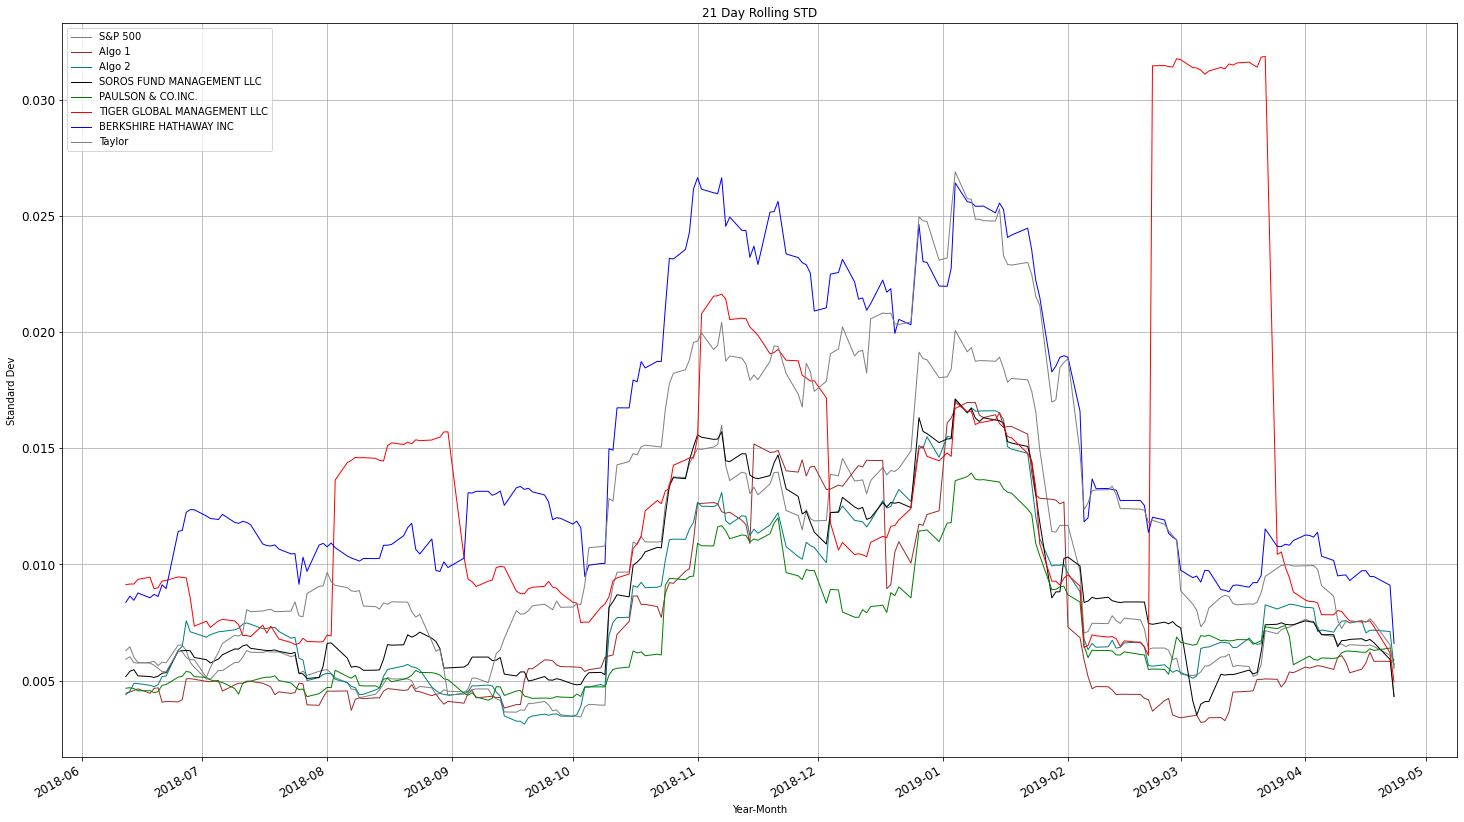

In [284]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = og_returns_df.rolling(window=21).std().dropna()
# Plot the rolling standard deviation
rolling_std.plot(
        kind = 'line', figsize = (25,15), grid = True, lw = 1, title = "21 Day Rolling STD", ylabel = "Standard Dev", xlabel = 'Year-Month', fontsize = 12, color = ['grey','brown','teal','black','green','red','blue'])

### Calculate and plot the correlation

<AxesSubplot:>

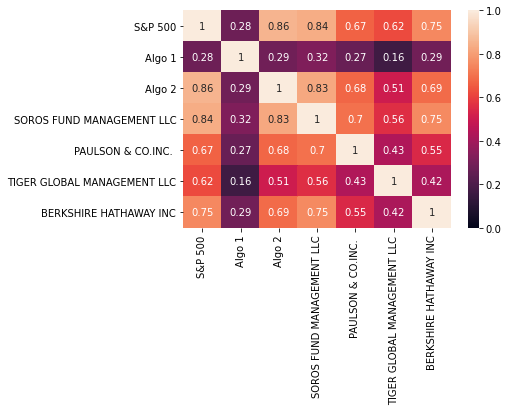

In [242]:
# Calculate the correlation
corr = og_returns_df.corr()
# Display de correlation matrix
sns.heatmap(corr,vmin = 0,vmax = 1, annot = True,)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Beta'}, xlabel='Year-Month', ylabel='Beta'>

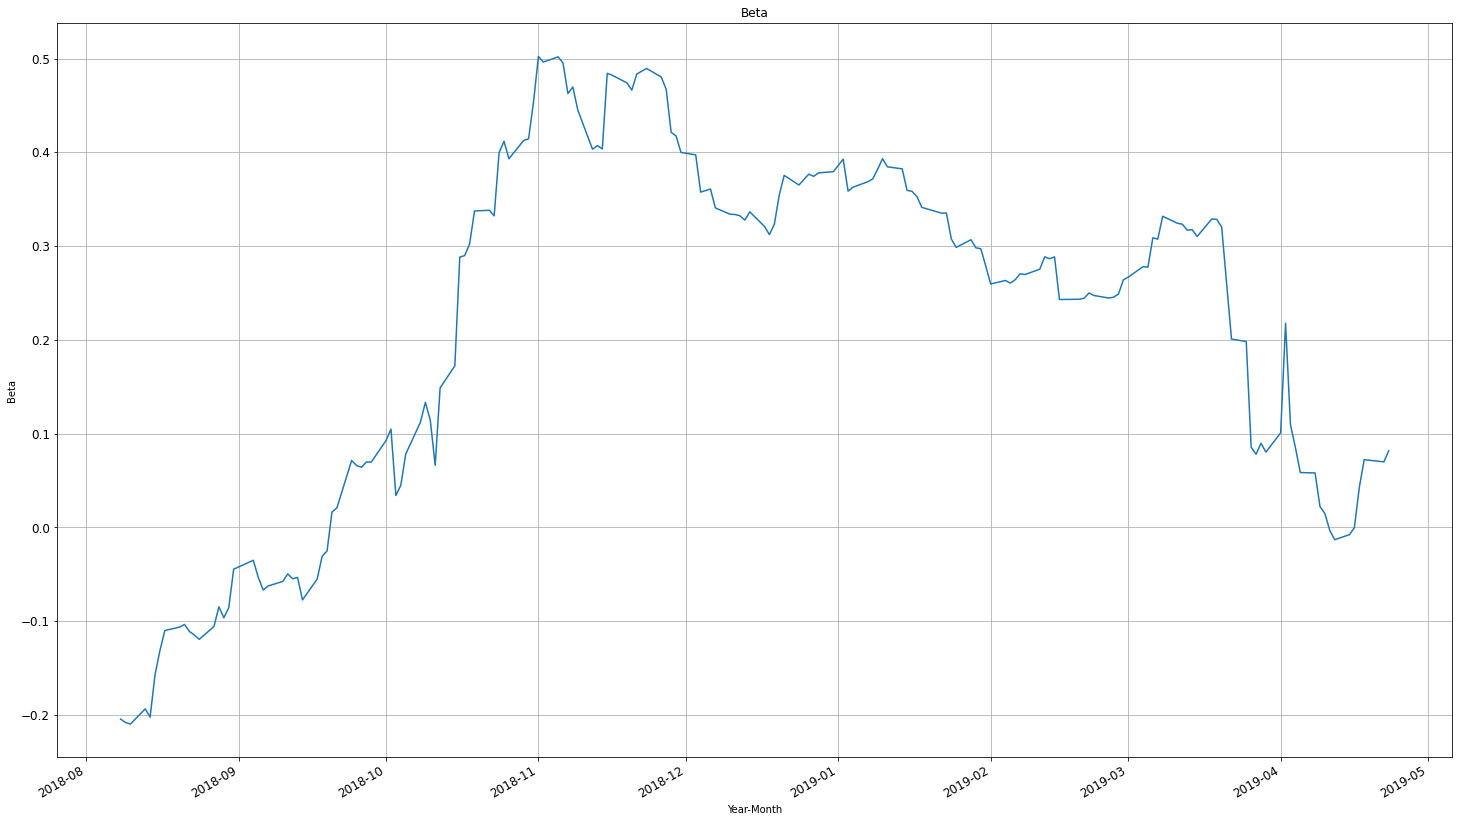

In [292]:
# Calculate covariance of a single portfolio
algo_1_cv= og_returns_df['Algo 1'].cov(og_returns_df['S&P 500'])
# Calculate variance of S&P 500
sp_var = og_returns_df['S&P 500'].var()
# Computing beta
algo_beta = algo_1_cv / sp_var
# Plot beta trend
R_algo_1_cv= og_returns_df['Algo 1'].rolling(window = 61).cov(og_returns_df['S&P 500'])
R_sp_var = og_returns_df['S&P 500'].rolling(window = 61).var()
R_algo_beta = R_algo_1_cv / R_sp_var
R_algo_beta.plot(figsize = (25,15),title = "Beta", ylabel = "Beta"
, xlabel = 'Year-Month', fontsize = 12, grid = True)

"## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

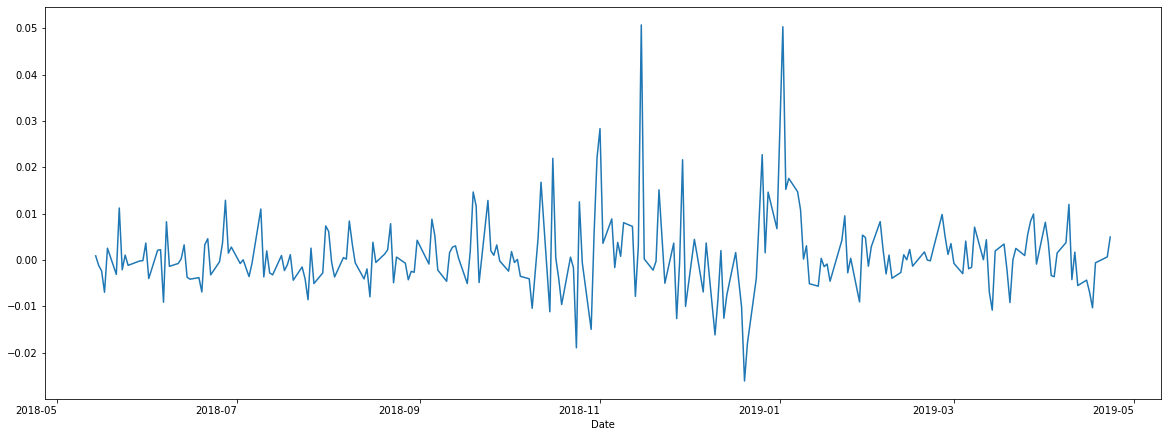

In [276]:
# Use `ewm` to calculate the rolling window
ewa = og_returns_df['Algo 1'].ewm(halflife = '21', times = (og_returns_df.index)).mean()
ewa.plot(rot = 360, figsize = (20,8), fontsize = 10)

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [245]:
# Annualized Sharpe Ratios
sharpe = (og_returns_df.mean()*252)/(og_returns_df.std()*np.sqrt(252))

<AxesSubplot:>

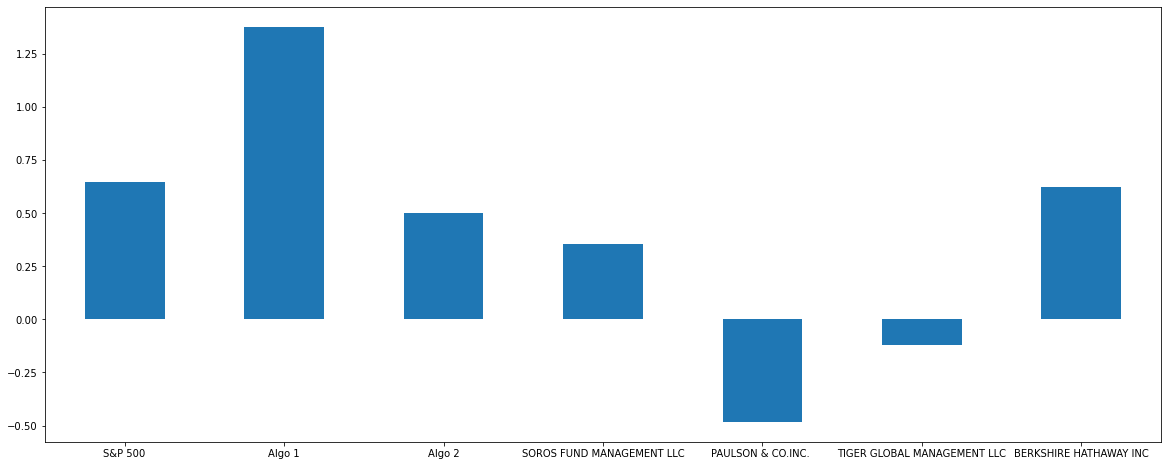

In [275]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot(kind = "bar", rot = 360, figsize = (20,8), fontsize = 10)

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [247]:
# Reading data from 1st stock
goog_df = pd.read_csv('.//Resources/goog_historical.csv', index_col='Trade DATE',infer_datetime_format=True, parse_dates= True).sort_index()
goog_df = goog_df['NOCP']
goog_df = goog_df.rename('Google')
goog_df

Trade DATE
2018-05-11    1098.26
2018-05-14    1100.20
2018-05-15    1079.23
2018-05-16    1081.77
2018-05-17    1078.59
               ...   
2019-05-03    1185.40
2019-05-06    1189.39
2019-05-07    1174.10
2019-05-08    1166.27
2019-05-09    1162.38
Name: Google, Length: 250, dtype: float64

In [248]:
# Reading data from 2nd stock
aapl_df = pd.read_csv('.//Resources/aapl_historical.csv', index_col='Trade DATE',infer_datetime_format=True, parse_dates= True).sort_index()
aapl_df = aapl_df['NOCP']
aapl_df = aapl_df.rename('Apple')
aapl_df

Trade DATE
2018-05-11    188.59
2018-05-14    188.15
2018-05-15    186.44
2018-05-16    188.18
2018-05-17    186.99
               ...  
2019-05-03    211.75
2019-05-06    208.48
2019-05-07    202.86
2019-05-08    202.90
2019-05-09    200.72
Name: Apple, Length: 250, dtype: float64

In [249]:
# Reading data from 3rd stock
cost_df = pd.read_csv('.//Resources/cost_historical.csv', index_col='Trade DATE',infer_datetime_format=True, parse_dates = True).sort_index()
cost_df = cost_df['NOCP']
cost_df = cost_df.rename('Costco')
cost_df

Trade DATE
2018-05-11    195.76
2018-05-14    195.88
2018-05-15    195.48
2018-05-16    198.71
2018-05-17    199.60
               ...  
2019-05-03    244.62
2019-05-06    244.23
2019-05-07    240.18
2019-05-08    241.34
2019-05-09    243.47
Name: Costco, Length: 250, dtype: float64

In [282]:
# Combine all stocks in a single DataFrame # Reorganize portfolio data by having a column per symbol
portfol = pd.concat([goog_df, aapl_df, cost_df], axis = "columns", join = "inner")
portfol.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


In [278]:
# Calculate daily returns based off previous close # Drop NAs
port_returns = portfol.pct_change().dropna()
# Reset Date index
port_returns = port_returns.rename_axis('Date')
# Display sample data
port_returns.head()


,Google,Apple,Costco
Date,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [254]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_returns = port_returns.dot(weights)
# Display sample data
port_returns

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
                ...   
2019-05-03    0.013329
2019-05-06   -0.004557
2019-05-07   -0.018798
2019-05-08   -0.000547
2019-05-09   -0.001751
Length: 249, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [255]:
# Join your returns DataFrame to the original returns DataFrame
og_returns_df = pd.concat([og_returns_df, port_returns], axis="columns", join='inner')
og_returns_df = og_returns_df.rename(columns = {0:'Taylor'})

In [256]:
og_returns_df.head()

,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Taylor
Date,,,,,,,,
2018-05-14,0.000884,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061


In [257]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
og_returns_df.dropna()


,S&P 500,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Taylor
Date,,,,,,,,
2018-05-14,0.000884,0.000915,0.001635,0.000000,0.000000,0.000000,0.000000,0.000015
2018-05-15,-0.006842,-0.001135,-0.001139,-0.000726,-0.001409,-0.003189,-0.014606,-0.010064
2018-05-16,0.004061,-0.002326,0.003341,0.008637,0.006244,0.005480,0.004310,0.009403
2018-05-17,-0.000856,-0.006949,0.005205,-0.001955,0.002524,-0.006267,-0.005140,-0.001595
2018-05-18,-0.002632,0.002557,-0.002496,-0.004357,-0.002672,-0.012832,-0.002212,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.000509,-0.006945,0.002899,0.002699,0.000388,-0.000831,0.000837,0.000340
2019-04-17,-0.002274,-0.010301,-0.005228,-0.002897,-0.006467,-0.004409,0.003222,0.009292
2019-04-18,0.001579,-0.000588,-0.001229,0.001448,0.001222,0.000582,0.001916,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [258]:
# Calculate the annualized `std`
og_returns_std = (og_returns_df.std())*np.sqrt(252)
og_returns_std

S&P 500                        0.152054
Algo 1                         0.133704
Algo 2                         0.139556
SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Taylor                         0.211496
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

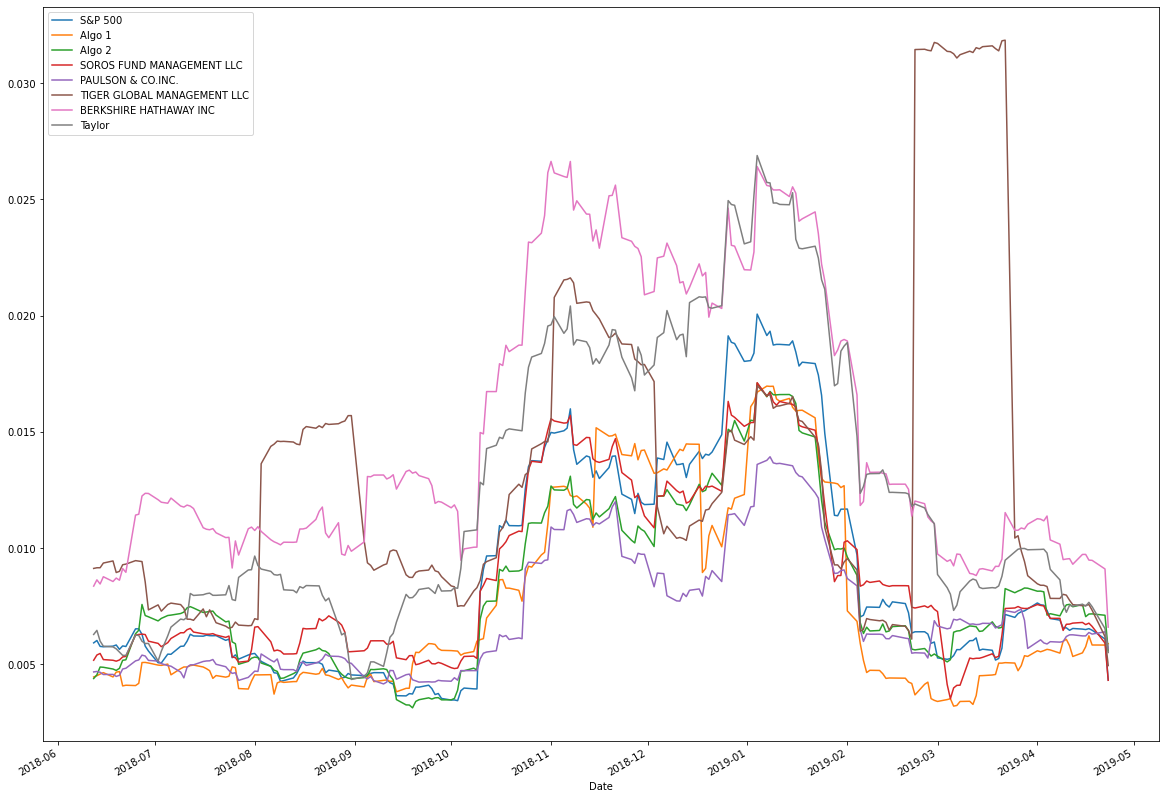

In [259]:
# Calculate rolling standard deviation
roll_std = og_returns_df.rolling(window=21).std()
# Plot rolling standard deviation
roll_std.plot(figsize = (20,15))

### Calculate and plot the correlation

<AxesSubplot:>

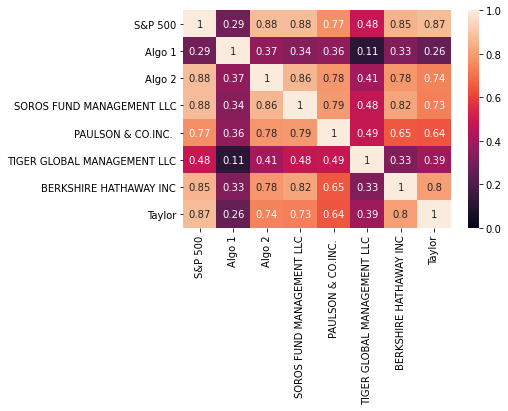

In [270]:
# Calculate and plot the correlation
port_corr = og_returns_df.corr()
sns.heatmap(port_corr, vmin=0,vmax=1, annot=True)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:xlabel='Date'>

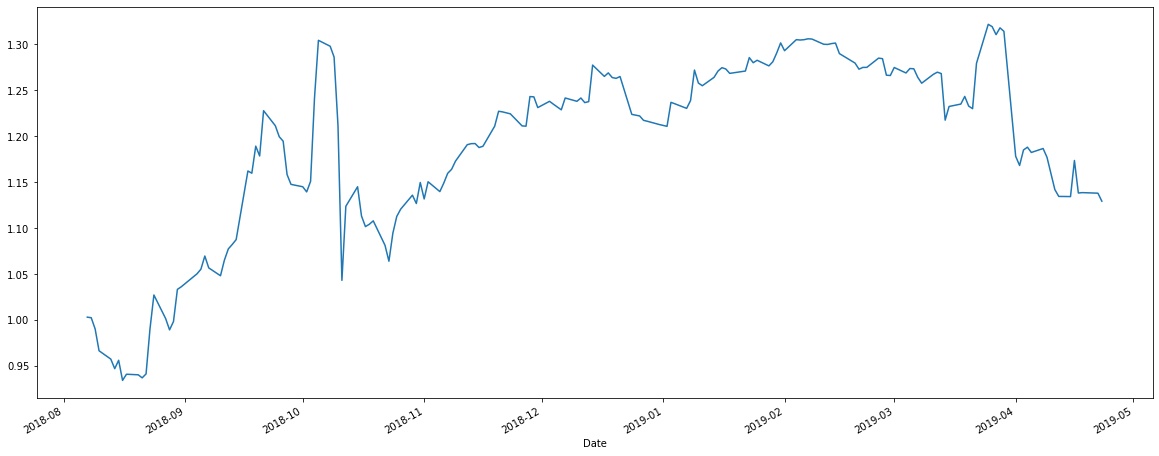

In [271]:
# Calculate and plot Beta
port_cov = og_returns_df["Taylor"].rolling(window = 60).cov(og_returns_df["S&P 500"])
port_var = og_returns_df["S&P 500"].rolling(window = 60).var()
port_beta = port_cov / port_var
port_beta.plot(figsize = (20,8))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [262]:
# Calculate Annualzied Sharpe Ratios
port_sharpe = (og_returns_df.mean()*252) / (og_returns_df.std()*np.sqrt(252))
port_sharpe = port_sharpe.sort_values()
port_sharpe

TIGER GLOBAL MANAGEMENT LLC   -1.034216
Algo 2                         0.080607
BERKSHIRE HATHAWAY INC         0.159756
PAULSON & CO.INC.              0.258738
SOROS FUND MANAGEMENT LLC      0.430713
S&P 500                        0.584820
Taylor                         0.933123
Algo 1                         2.035665
dtype: float64

<AxesSubplot:>

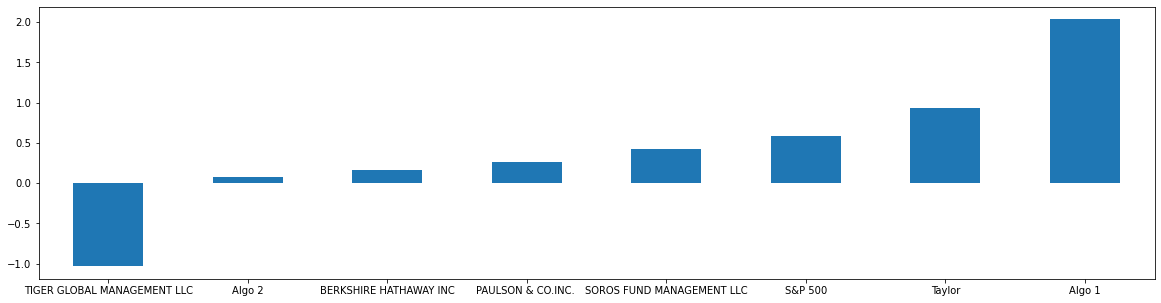

In [281]:
# Visualize the sharpe ratios as a bar plot
port_sharpe.plot(kind="bar", figsize = (20,5), rot = 360, fontsize = 10)

### How does your portfolio do?

Write your answer here!

In [ ]:
# my portfolio 